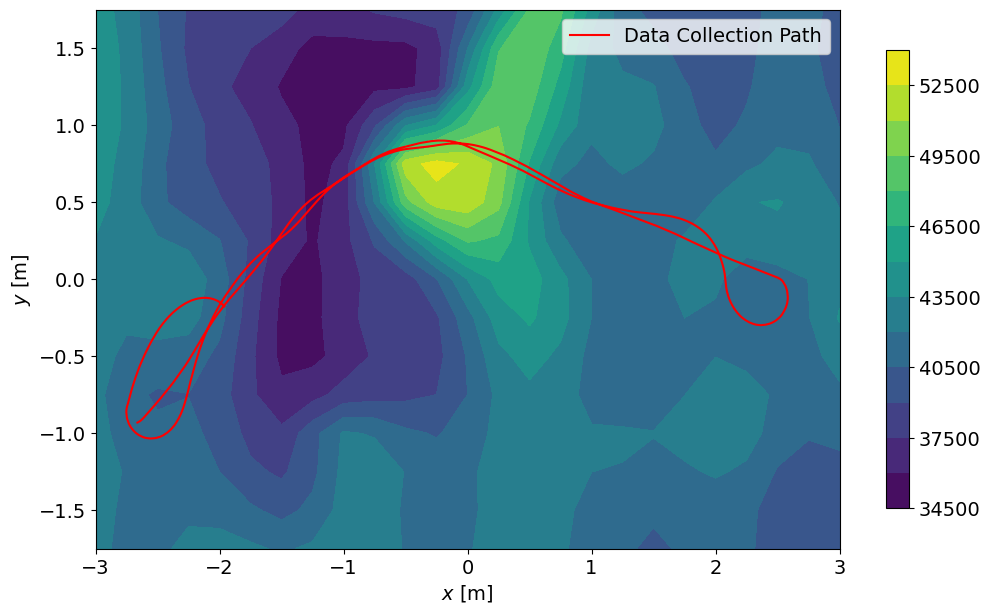

In [34]:
import numpy as np
import json 
import matplotlib.pyplot as plt

data = json.load(open("/home/aditya/UFL Dropbox/Aditya Penumarti/aprilab_root/projects/magnav/magnetometer_sim/data/test_data/211124T162931_test_data_leo_simplePath_lidar_off/leo_test_data.json", "r"))

map_data = np.genfromtxt("/home/aditya/UFL Dropbox/Aditya Penumarti/aprilab_root/projects/magnav/magnetometer_sim/data/map/90_map.csv", delimiter=",", skip_header=1)
x = map_data[:, 0]
y = map_data[:, 1]
mag = map_data[:, 3]
# rounding x and y to the closest 0.05
# x = np.round(x, 2)
# y = np.round(y, 2)
X, Y = np.meshgrid(np.unique(x), np.unique(y))
Z = mag.reshape(len(np.unique(y)), len(np.unique(x)))
plt.figure(figsize=(12, 7))
contour = plt.contourf(X, Y, Z, 15, cmap="viridis")
cbar = plt.colorbar(contour,shrink=0.85)
#setting colorbar ticks properties
cbar.ax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x$ [m]", fontsize=14)
plt.ylabel("$y$ [m]", fontsize=14)
path = np.array([pose['pose_data'] for pose in data])
plt.plot(path[:, 0], path[:, 1], 'r', label="Data Collection Path")
plt.legend(fontsize=14)
plt.savefig("../figs/PDF/SimplePathmap_path.pdf",dpi=300,bbox_inches='tight',pad_inches=0.0)
plt.savefig("../figs/SVG/SimplePathmap_path.svg",dpi=300,bbox_inches='tight',pad_inches=0.0)
plt.show()